# Overfitting and regularization

<http://neuralnetworksanddeeplearning.com/chap3.html#overfitting_and_regularization>

Math background Section 5.2 of <http://www.deeplearningbook.org/contents/ml.html> 


Underfitting occurs when the model is not able to obtain a sufficiently low error value on the training set. 

Overfitting occurs when the gap between the training error and test error is too large.


## Regression

Overfitting example in <http://neuralnetworksanddeeplearning.com/chap3.html#why_does_regularization_help_reduce_overfitting>


Suppose we have a simple data set of 9 points for which we wish to build a model
- we can find a unique 9th-order polynomial $y = a_0 x^9 + a_1 x^8 + \ldots + a_9$ which fits the data exactly.
-  we can also get a good fit using the linear model $y = 2x$

Suppose we want to predict the value of y corresponding to some large value of x, much larger than any data points there will be a dramatic difference between the predictions of the two models, as the 9th order polynomial model comes to be dominated by the x9 term, while the linear model remains linear. The 9th order model has is really just learning the effects of local noise and this brings huge error in prediction.

And so while the 9th order model works perfectly for these particular data points, the model will fail to generalize to other data points, and the noisy linear model will have greater predictive power.



# Neural network

## Experiment 1:

- use 1000 images to train to highlight network training behaviors
- set num_epochs = 400 batch_size = 10 learning = 0.5
- plot cost and accuracy for training and test data
- Results: in the "accuracy on test data" plot the learning gradually slows down and, at around epoch 150 (may change) the classification accuracy pretty much stops improving. We say the network is overfitting or overtraining beyond epoch 150 (may change). Same phenomenon shows up if we compare cost or classification accuracy on training and test data

## Experiment 2:

- use all training set of 50000 images
- 30 epochs 
- Result: the accuracy on the test and training data remain much closer together than when we were using 1,000 training. Overfitting is still going on, but it's been greatly reduced. The network is generalizing much better from the training data to the test data. **In general, one of the best ways of reducing overfitting is to increase the size of the training data.**


# Dataset

Dataset have two main groups:

- training data
- test data

Training data can be split in two groups:

- training reduced data
- validation data

Strategy is to:

- train network with training reduced dataset
- test/validate different hyper-parameters on validation data (see how the network generalize)
- finally test the network on test data

when setting hyper-parameters we're likely to try many different choices for the hyper-parameters
validation data is a type of training data that helps us learn good hyper-parameters


In [37]:
# Reset and load python functions
%reset
%run python/download_data.py
%run python/mnist_loader.py
%run python/network2.py
%run python/overfitting.py

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [38]:
# Experiment 1 (see note above)

training_data, validation_data, test_data = load_data_wrapper()
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Hyper-parameters:
num_epochs_1 = 400
batch_size_1 = 10
learning_1 = 0.5
lmbda_1 = 0.0
training_set_size = 1000
data,label = zip(*training_data)
training_data_1000 = zip(data[:training_set_size],label[:training_set_size])
#test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data_1000, epochs, batch_size, learning, evaluation_data=test_data, monitor_evaluation_accuracy=True, monitor_training_cost=True)
test_cost_1, test_accuracy_1, training_cost_1, training_accuracy_1 = net.SGD(
    training_data_1000, num_epochs_1, batch_size_1, learning_1,
    evaluation_data=test_data, lmbda = lmbda,
    monitor_evaluation_cost=True, 
    monitor_evaluation_accuracy=True, 
    monitor_training_cost=True, 
    monitor_training_accuracy=True)
# Store data to file
f = open("data/overfitting_1.json", "w")
json.dump([test_cost_1, test_accuracy_1, training_cost_1, training_accuracy_1], f)
f.close()

Epoch 0 training complete
Cost on training data: 1.9977758661361846
Accuracy on training data: 651 / 1000
Cost on evaluation data: 2.2311287729033826
Accuracy on evaluation data: 5683 / 10000
Epoch 1 training complete
Cost on training data: 1.551031798649286
Accuracy on training data: 757 / 1000
Cost on evaluation data: 1.9050373369356743
Accuracy on evaluation data: 6468 / 10000
Epoch 2 training complete
Cost on training data: 1.1986129456990136
Accuracy on training data: 827 / 1000
Cost on evaluation data: 1.6099739844923222
Accuracy on evaluation data: 7174 / 10000
Epoch 3 training complete
Cost on training data: 0.9938552308442485
Accuracy on training data: 869 / 1000
Cost on evaluation data: 1.4633733058079186
Accuracy on evaluation data: 7406 / 10000
Epoch 4 training complete
Cost on training data: 0.8980824053008403
Accuracy on training data: 876 / 1000
Cost on evaluation data: 1.4590866793770567
Accuracy on evaluation data: 7380 / 10000
Epoch 5 training complete
Cost on trainin

Cost on evaluation data: 1.3184973098731052
Accuracy on evaluation data: 8208 / 10000
Epoch 43 training complete
Cost on training data: 0.0648643426662584
Accuracy on training data: 999 / 1000
Cost on evaluation data: 1.3163673375018787
Accuracy on evaluation data: 8219 / 10000
Epoch 44 training complete
Cost on training data: 0.06266646122669725
Accuracy on training data: 998 / 1000
Cost on evaluation data: 1.3202044419932648
Accuracy on evaluation data: 8226 / 10000
Epoch 45 training complete
Cost on training data: 0.060901480776296445
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.3226061547680565
Accuracy on evaluation data: 8230 / 10000
Epoch 46 training complete
Cost on training data: 0.05893846960418712
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.3152493843401436
Accuracy on evaluation data: 8224 / 10000
Epoch 47 training complete
Cost on training data: 0.05630566780492643
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.

Accuracy on evaluation data: 8238 / 10000
Epoch 85 training complete
Cost on training data: 0.024147093747294145
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.444536211993927
Accuracy on evaluation data: 8239 / 10000
Epoch 86 training complete
Cost on training data: 0.023795100499731305
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.4441526142818328
Accuracy on evaluation data: 8253 / 10000
Epoch 87 training complete
Cost on training data: 0.023430071961754
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.450954517691492
Accuracy on evaluation data: 8241 / 10000
Epoch 88 training complete
Cost on training data: 0.02310340441717341
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.4549378879808443
Accuracy on evaluation data: 8242 / 10000
Epoch 89 training complete
Cost on training data: 0.022781486700543013
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.4528166345429134
Accuracy on evaluation dat

Accuracy on evaluation data: 8260 / 10000
Epoch 127 training complete
Cost on training data: 0.01408473674015902
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5165662455073703
Accuracy on evaluation data: 8261 / 10000
Epoch 128 training complete
Cost on training data: 0.013954945189337986
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5177344297972661
Accuracy on evaluation data: 8260 / 10000
Epoch 129 training complete
Cost on training data: 0.013818904040256616
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5180294145602398
Accuracy on evaluation data: 8264 / 10000
Epoch 130 training complete
Cost on training data: 0.013687539956473212
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5182826230804898
Accuracy on evaluation data: 8262 / 10000
Epoch 131 training complete
Cost on training data: 0.0135445577441797
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.522068941618988
Accuracy on evaluat

Cost on evaluation data: 1.5600453171841553
Accuracy on evaluation data: 8280 / 10000
Epoch 169 training complete
Cost on training data: 0.009896067105001518
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5609812649209192
Accuracy on evaluation data: 8280 / 10000
Epoch 170 training complete
Cost on training data: 0.009827974301027548
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5622138013976952
Accuracy on evaluation data: 8283 / 10000
Epoch 171 training complete
Cost on training data: 0.009759472841433029
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5637739971518383
Accuracy on evaluation data: 8276 / 10000
Epoch 172 training complete
Cost on training data: 0.009695496916433033
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5632454340871946
Accuracy on evaluation data: 8282 / 10000
Epoch 173 training complete
Cost on training data: 0.009622966162345953
Accuracy on training data: 1000 / 1000
Cost on evaluat

Cost on evaluation data: 1.5967224335747754
Accuracy on evaluation data: 8288 / 10000
Epoch 211 training complete
Cost on training data: 0.007594490969049448
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5974450281213242
Accuracy on evaluation data: 8289 / 10000
Epoch 212 training complete
Cost on training data: 0.007551337075706901
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.597993891981173
Accuracy on evaluation data: 8289 / 10000
Epoch 213 training complete
Cost on training data: 0.007509150305550348
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5992614711528894
Accuracy on evaluation data: 8289 / 10000
Epoch 214 training complete
Cost on training data: 0.007467167830974914
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5987671625220503
Accuracy on evaluation data: 8289 / 10000
Epoch 215 training complete
Cost on training data: 0.007425872490154753
Accuracy on training data: 1000 / 1000
Cost on evaluati

Cost on evaluation data: 1.6259753515237625
Accuracy on evaluation data: 8293 / 10000
Epoch 253 training complete
Cost on training data: 0.006111890353778283
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6266312717740126
Accuracy on evaluation data: 8294 / 10000
Epoch 254 training complete
Cost on training data: 0.0060839307635957305
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6269970403499638
Accuracy on evaluation data: 8297 / 10000
Epoch 255 training complete
Cost on training data: 0.006055048584342128
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6278804118890087
Accuracy on evaluation data: 8295 / 10000
Epoch 256 training complete
Cost on training data: 0.006026390176115088
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6289077743620741
Accuracy on evaluation data: 8294 / 10000
Epoch 257 training complete
Cost on training data: 0.005998344906926743
Accuracy on training data: 1000 / 1000
Cost on evalua

Cost on evaluation data: 1.6511830469190307
Accuracy on evaluation data: 8304 / 10000
Epoch 295 training complete
Cost on training data: 0.005086487030453455
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6515888014703608
Accuracy on evaluation data: 8304 / 10000
Epoch 296 training complete
Cost on training data: 0.005065838501630692
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.651907235168318
Accuracy on evaluation data: 8304 / 10000
Epoch 297 training complete
Cost on training data: 0.00504553687325457
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6521663507326458
Accuracy on evaluation data: 8306 / 10000
Epoch 298 training complete
Cost on training data: 0.005025070311342716
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6525928832970171
Accuracy on evaluation data: 8305 / 10000
Epoch 299 training complete
Cost on training data: 0.005005071130429402
Accuracy on training data: 1000 / 1000
Cost on evaluatio

Cost on evaluation data: 1.6722962871333478
Accuracy on evaluation data: 8314 / 10000
Epoch 337 training complete
Cost on training data: 0.004343972909756162
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6723635372662278
Accuracy on evaluation data: 8314 / 10000
Epoch 338 training complete
Cost on training data: 0.00432939956684726
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6730920576355952
Accuracy on evaluation data: 8314 / 10000
Epoch 339 training complete
Cost on training data: 0.0043140626569944905
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6737128823930412
Accuracy on evaluation data: 8313 / 10000
Epoch 340 training complete
Cost on training data: 0.004299333482100035
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.673824058944833
Accuracy on evaluation data: 8314 / 10000
Epoch 341 training complete
Cost on training data: 0.004284788575915952
Accuracy on training data: 1000 / 1000
Cost on evaluati

Cost on evaluation data: 1.6915872923197364
Accuracy on evaluation data: 8308 / 10000
Epoch 379 training complete
Cost on training data: 0.0037876761542993205
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6921194902251189
Accuracy on evaluation data: 8307 / 10000
Epoch 380 training complete
Cost on training data: 0.0037758466642973418
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6923361016796916
Accuracy on evaluation data: 8307 / 10000
Epoch 381 training complete
Cost on training data: 0.003764210076470338
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.692291099437888
Accuracy on evaluation data: 8306 / 10000
Epoch 382 training complete
Cost on training data: 0.003752410157358167
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.693338643061559
Accuracy on evaluation data: 8307 / 10000
Epoch 383 training complete
Cost on training data: 0.0037407746928644963
Accuracy on training data: 1000 / 1000
Cost on evalua

In [42]:
%matplotlib notebook
training_cost_xmin = 0
plot_training_cost(training_cost_1, num_epochs_1, training_cost_xmin)

training_accuracy_xmin = 0
plot_training_accuracy(training_accuracy_1, num_epochs_1, training_accuracy_xmin, training_set_size)

test_accuracy_xmin = 0
plot_test_accuracy(test_accuracy_1, num_epochs_1, test_accuracy_xmin)

test_cost_xmin = 0
plot_test_cost(test_cost_1, num_epochs_1, test_cost_xmin)


NameError: name 'num_epochs_1' is not defined

In [43]:
# Experiment 2 (see note above)

training_data, validation_data, test_data = load_data_wrapper()
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Hyper-parameters:
num_epochs_2 = 30
batch_size_2 = 10
learning_2 = 0.5
lmbda_2 = 0.0
test_cost_2, test_accuracy_2, training_cost_2, training_accuracy_2 = net.SGD(
    training_data, num_epochs_2, batch_size_2, learning_2,
    evaluation_data=test_data, lmbda = lmbda_2,
    monitor_evaluation_cost=True, 
    monitor_evaluation_accuracy=True, 
    monitor_training_cost=True, 
    monitor_training_accuracy=True)
# Store data to file
f = open("data/overfitting_2.json", "w")
json.dump([test_cost_2, test_accuracy_2, training_cost_2, training_accuracy_2], f)
f.close()

Epoch 0 training complete
Cost on training data: 0.5563220642179834
Accuracy on training data: 45795 / 50000
Cost on evaluation data: 0.5709395088716738
Accuracy on evaluation data: 9150 / 10000
Epoch 1 training complete
Cost on training data: 0.4424453590556936
Accuracy on training data: 46614 / 50000
Cost on evaluation data: 0.4684377780493803
Accuracy on evaluation data: 9278 / 10000
Epoch 2 training complete
Cost on training data: 0.42630220190562856
Accuracy on training data: 46796 / 50000
Cost on evaluation data: 0.48499723606770756
Accuracy on evaluation data: 9273 / 10000
Epoch 3 training complete
Cost on training data: 0.38363592330436896
Accuracy on training data: 47157 / 50000
Cost on evaluation data: 0.4429033600368216
Accuracy on evaluation data: 9341 / 10000
Epoch 4 training complete
Cost on training data: 0.3332514983028413
Accuracy on training data: 47596 / 50000
Cost on evaluation data: 0.40176908322297733
Accuracy on evaluation data: 9426 / 10000
Epoch 5 training comp

<IPython.core.display.Javascript object>


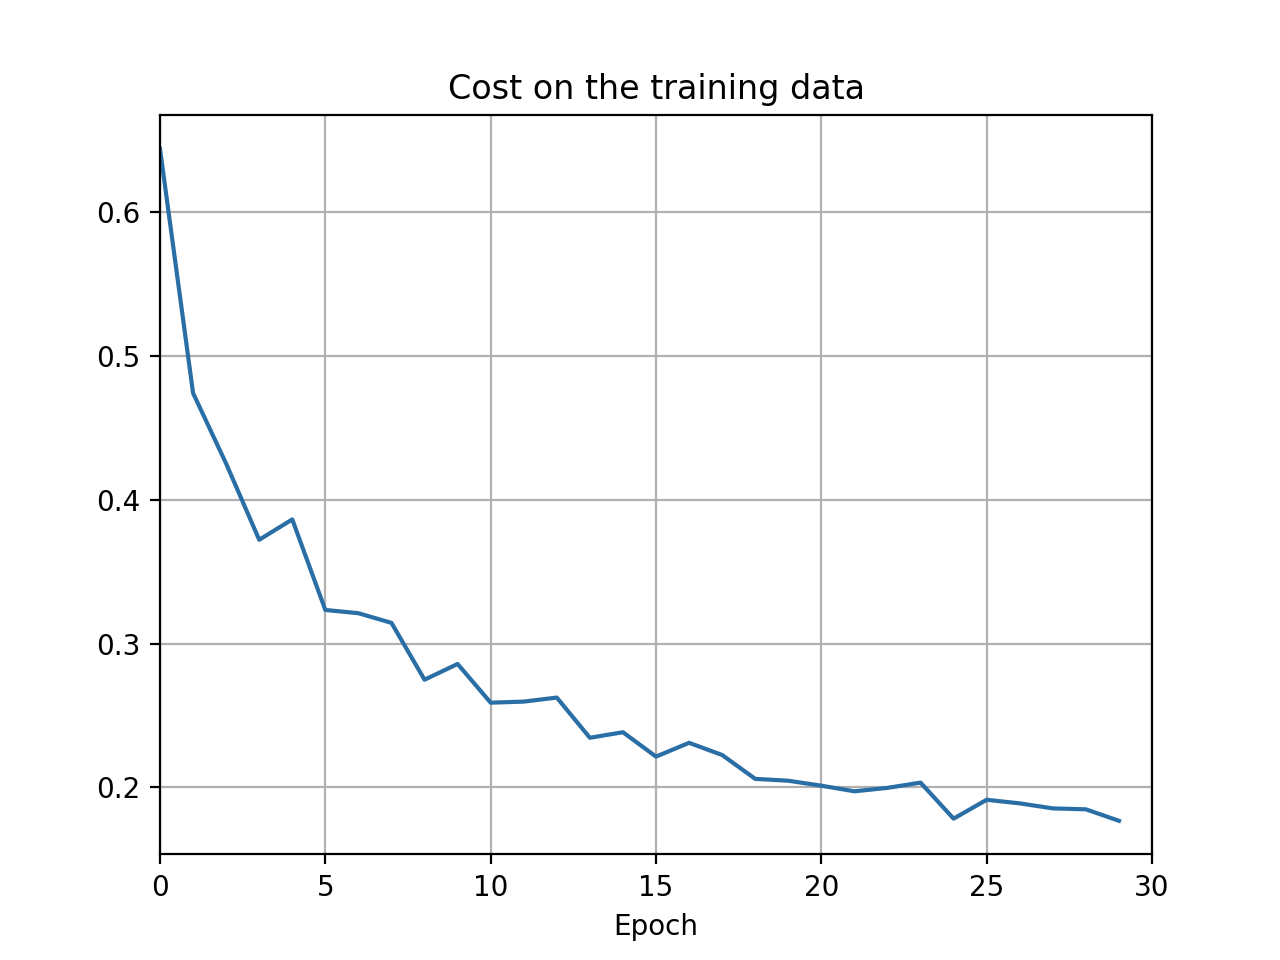

<IPython.core.display.Javascript object>


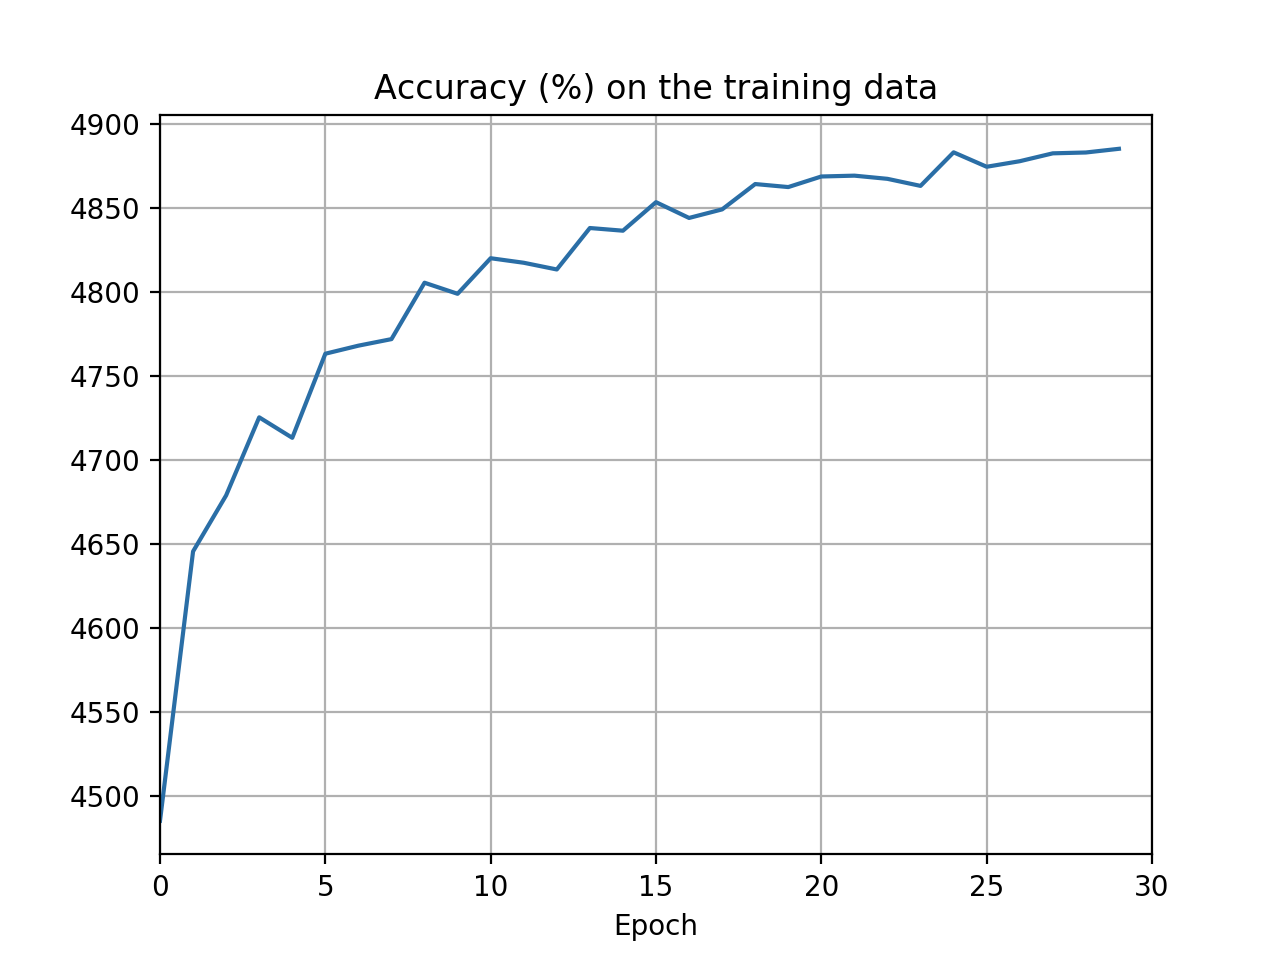

<IPython.core.display.Javascript object>


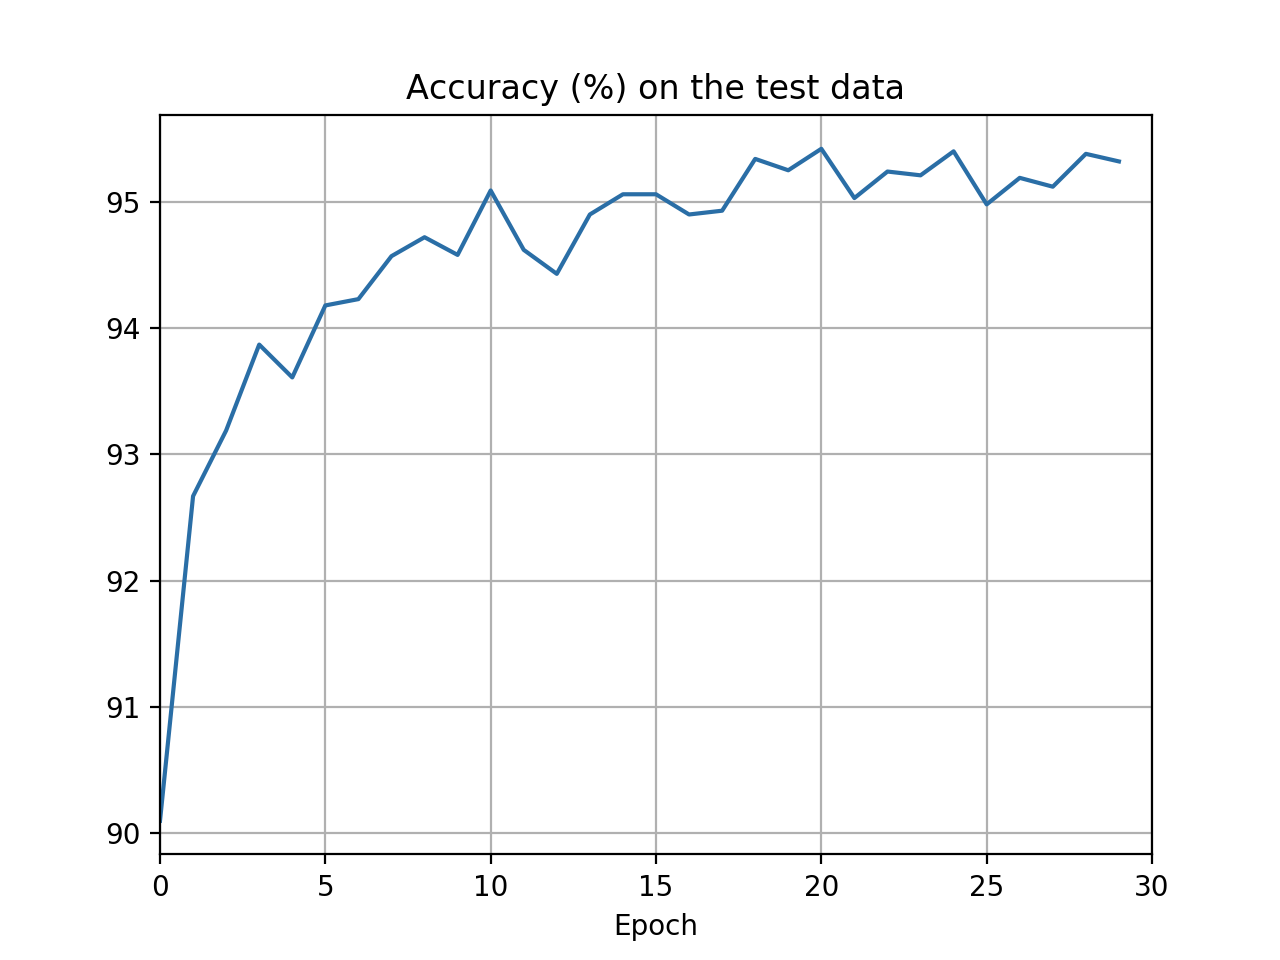

<IPython.core.display.Javascript object>


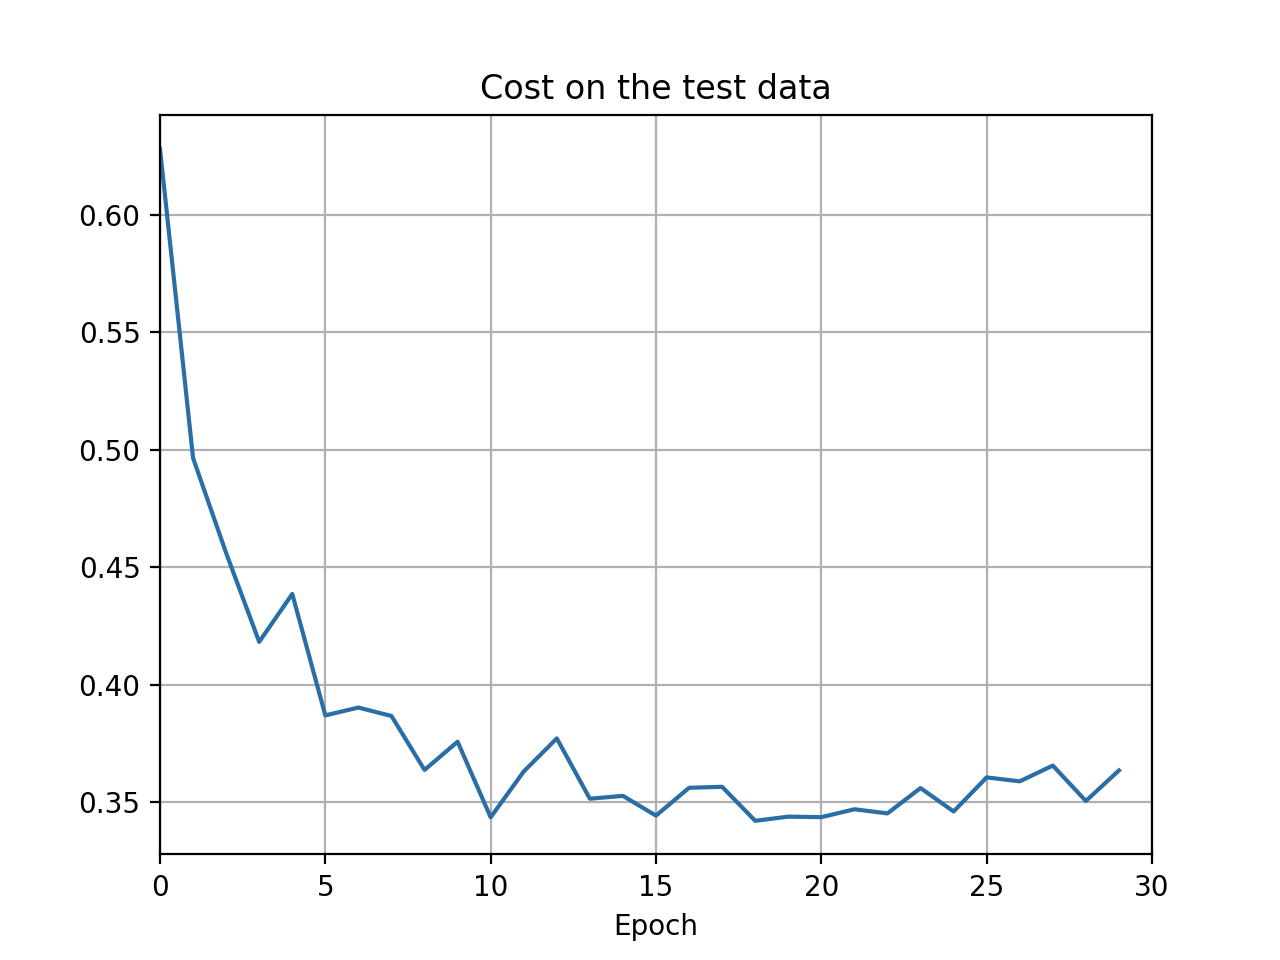

In [40]:
%matplotlib notebook
training_cost_xmin = 0
plot_training_cost(training_cost_2, num_epochs_2, training_cost_xmin)

training_accuracy_xmin = 0
plot_training_accuracy(training_accuracy_2, num_epochs_2, training_accuracy_xmin, training_set_size)

test_accuracy_xmin = 0
plot_test_accuracy(test_accuracy_2, num_epochs_2, test_accuracy_xmin)

test_cost_xmin = 0
plot_test_cost(test_cost_2, num_epochs_2, test_cost_xmin)